# <font color='grey'>Project 12-</font> 
# <font color='grey'>Divorce Data Analysis</font> 
### ***Presented By :       Hadar Elkaslasi , Meitav Rotenberg , Naomi Homburger , Elisheva Oyer***

<img src= "https://raw.githubusercontent.com/naomihom/picture/main/divorce_picture.png" width="700"/>

## <font color='grey'> Data Understanding:</font>
#### This dataset contains data about 170 people with their corresponding Divorce Predictors Scale variables (DPS) on the basis of ***"Gottman couples therapy"***.
#### The records were acquired from face-to-face interviews from people who were already divorced or happily married.
#### All responses were collected on a 5 point scale ***(0=Strongly Disagree , 1=Disagree, 2=Neutral, 3=Agree, 4=Strongly Agree)***.

In [1832]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

url = 'https://raw.githubusercontent.com/ElishOyer/DataAnalysisProject/main/divorce_data1.csv'
data = pd.read_csv(url)
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,1,0,0,4,4,4,...,2,2,3,4,4,4,4,2,0,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,1,1
3,3,2,3,2,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,1,1


## <font color='grey'>Data Preperation:</font>
#### The questions from the interviews were given by numbers.
#### In order to make it easier to work with we transferred column headings of the data to short versions of the questions :

In [1810]:
data.columns = ['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time', 'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel', 'common_goals', 'harmony', 'freeom_value','entertain','people_goals','dreams','Love','happy','marriage','roles','trust','likes','care_sick','fav_food','stresses','inner_world','anxieties','current_stress','hopes_wishes','know_well','friends_social','Aggro_argue','Always_never','negative_personality','offensive_expressions','insult','humiliate','not_calm','hate_subjects','sudden_discussion','idk_whats_going_on','calm_breaks','argue_then_leave','silent_for_calm','good_to_leave_home','silence_instead_of_discussion','silence_for_harm','silence_fear_anger','I_am_right','accusations','I_am_not_guilty','I_am_not_wrong','no_hesitancy_inadequate','you_are_inadequate','incompetence','Divorce_Y_N']
data.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I_am_right,accusations,I_am_not_guilty,I_am_not_wrong,no_hesitancy_inadequate,you_are_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,1,0,0,4,4,4,...,2,2,3,4,4,4,4,2,0,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,1,1
3,3,2,3,2,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,1,1


#### - We checked for missing values in the data :

In [1811]:
data.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
Love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

##### We found no missing values.

#### - We had to create new DataFrames to separate our data to several categories in order to ease our research:
#### We separated the data to married people and divorced people and created a Dataframe with counted values for each observation.

In [1812]:
#Separating data to married people and divorced people-
married = data[data['Divorce_Y_N']==0]
divorced = data[data['Divorce_Y_N']==1]

#DataFrame for Observation 1:
##Using value_counts to sum the answers-
columns = data.columns
negative_personality_married = married[columns[32]].value_counts(sort = False)
negative_personality_divorced = divorced[columns[32]].value_counts(sort = False)
incompetence_married = married[columns[53]].value_counts(sort = False)
incompetence_divorced = divorced[columns[53]].value_counts(sort = False)
insult_married = married[columns[34]].value_counts(sort = False)
insult_divorced = divorced[columns[34]].value_counts(sort = False)
humiliate_married = married[columns[35]].value_counts(sort = False)
humiliate_divorced = divorced[columns[35]].value_counts(sort = False)
Aggro_argue_married = married[columns[30]].value_counts(sort = False)
Aggro_argue_divorced = divorced[columns[30]].value_counts(sort = False)
not_calm_married = married[columns[36]].value_counts(sort = False)
not_calm_divorced = divorced[columns[36]].value_counts(sort = False)
argue_then_leave_married = married[columns[41]].value_counts(sort = False)
argue_then_leave_divorced = divorced[columns[41]].value_counts(sort = False)
silence_instead_of_discussion_married = married[columns[44]].value_counts(sort = False)
silence_instead_of_discussion_divorced = divorced[columns[44]].value_counts(sort = False)

df_negative_personality_married = pd.DataFrame(negative_personality_married)
df_negative_personality_divorced = pd.DataFrame(negative_personality_divorced)
df_incompetence_married = pd.DataFrame(incompetence_married)
df_incompetence_divorced = pd.DataFrame(incompetence_divorced)
df_insult_married = pd.DataFrame(insult_married)
df_insult_divorced = pd.DataFrame(insult_divorced)
df_humiliate_married = pd.DataFrame(humiliate_married)
df_humiliate_divorced = pd.DataFrame(humiliate_divorced)
df_Aggro_argue_married = pd.DataFrame(Aggro_argue_married)
df_Aggro_argue_divorced = pd.DataFrame(Aggro_argue_divorced)
df_not_calm_married = pd.DataFrame(not_calm_married)
df_not_calm_divorced = pd.DataFrame(not_calm_divorced)
df_argue_then_leave_married = pd.DataFrame(argue_then_leave_married)
df_argue_then_leave_divorced = pd.DataFrame(argue_then_leave_divorced)
df_silence_instead_of_discussion_married = pd.DataFrame(silence_instead_of_discussion_married)
df_silence_instead_of_discussion_divorced = pd.DataFrame(silence_instead_of_discussion_divorced)

##Filing the missing data with 0 = 0 people gave that answer-
negative_personality = pd.concat([df_negative_personality_married,df_negative_personality_divorced],axis=1,sort=True).fillna(0)
negative_personality.columns=['negative_personality_married','negative_personality_divorced']
insult = pd.concat([df_insult_married,df_insult_divorced],axis=1,sort=True).fillna(0)
insult.columns=['insult_married','insult_divorced']
Aggro_argue = pd.concat([df_Aggro_argue_married,df_Aggro_argue_divorced],axis=1,sort=True).fillna(0)
Aggro_argue.columns=['Aggro_argue_married','Aggro_argue_divorced']
argue_then_leave = pd.concat([df_argue_then_leave_married,df_argue_then_leave_divorced],axis=1,sort=True).fillna(0)
argue_then_leave.columns=['argue_then_leave_married','argue_then_leave_divorced']

#DataFrame for Observation 2:
incompetence=pd.concat([df_incompetence_married,df_incompetence_divorced],axis=1,sort=True).fillna(0)
incompetence.columns=['incompetence_married','incompetence_divorced'] 
data_incompetence_m_scatter= [(46,0),(24,1),(14,2),(1,3),(1,4)]
df_incompetence_m_scatter=pd.DataFrame(data= data_incompetence_m_scatter, columns=['people','Answer'])
data_incompetence_d_scatter= [(5,0),(28,1),(36,2),(12,3),(3,4)]
df_incompetence_d_scatter=pd.DataFrame(data= data_incompetence_d_scatter, columns=['people','Answer'])

#DataFrame for Observation 3:
new_data=data.iloc[:,[5,13,14,17,19,27,53]]
No_home_time_married = married[columns[5]].value_counts(sort = False)
No_home_time_divorced = divorced[columns[5]].value_counts(sort = False)
people_goals_married = married[columns[13]].value_counts(sort = False)
people_goals_divorced = divorced[columns[13]].value_counts(sort = False)
dreams_married = married[columns[14]].value_counts(sort = False)
dreams_divorced = divorced[columns[14]].value_counts(sort = False)
marriage_married = married[columns[17]].value_counts(sort = False)
marriage_divorced = divorced[columns[17]].value_counts(sort = False)
trust_married = married[columns[19]].value_counts(sort = False)
trust_divorced = divorced[columns[19]].value_counts(sort = False)
Special_time_married = married[columns[4]].value_counts(sort = False)
Special_time_divorced = divorced[columns[4]].value_counts(sort = False)
incompetence_married = married[columns[53]].value_counts(sort = False)
incompetence_divorced = divorced[columns[53]].value_counts(sort = False)

df_No_home_time_married = pd.DataFrame(No_home_time_married)
df_No_home_time_divorced = pd.DataFrame(No_home_time_divorced)
df_people_goals_married = pd.DataFrame(people_goals_married)
df_people_goals_divorced = pd.DataFrame(people_goals_divorced)
df_dreams_married = pd.DataFrame(dreams_married)
df_dreams_divorced = pd.DataFrame(dreams_divorced)
df_marriage_married = pd.DataFrame(marriage_married)
df_marriage_divorced = pd.DataFrame(marriage_divorced)
df_trust_married = pd.DataFrame(trust_married)
df_trust_divorced = pd.DataFrame(trust_divorced)
df_Special_time_married = pd.DataFrame(Special_time_married)
df_Special_time_divorced = pd.DataFrame(Special_time_divorced)
df_incompetence_married = pd.DataFrame(incompetence_married)
df_incompetence_divorced = pd.DataFrame(incompetence_divorced)

No_home_time=pd.concat([df_No_home_time_married,df_No_home_time_divorced],axis=1,sort=True).fillna(0)
No_home_time.columns=['No_home_time_married','No_home_time_divorced']
people_goals=pd.concat([df_people_goals_married,df_people_goals_divorced],axis=1,sort=True).fillna(0)
people_goals.columns=['people_goals_married','people_goals_divorced']
dreams = pd.concat([df_dreams_married,df_dreams_divorced],axis=1,sort=True).fillna(0)
dreams.columns=['dreams_married','dreams_divorced']
marriage=pd.concat([df_marriage_married,df_marriage_divorced],axis=1,sort=True).fillna(0)
marriage.columns=['marriage_married','marriage_divorced']
trust=pd.concat([df_trust_married,df_trust_divorced],axis=1,sort=True).fillna(0)
trust.columns=['trust_married','trust_divorced']
Special_time= pd.concat([df_Special_time_married,df_Special_time_divorced],axis=1,sort=True).fillna(0)
Special_time.columns=['Special_time_married','Special_time_divorced']
incompetence=pd.concat([df_incompetence_married,df_incompetence_divorced],axis=1,sort=True).fillna(0)
incompetence.columns=['incompetence_married','incompetence_divorced']



## <font color='grey'>Basic information about the Data:</font>

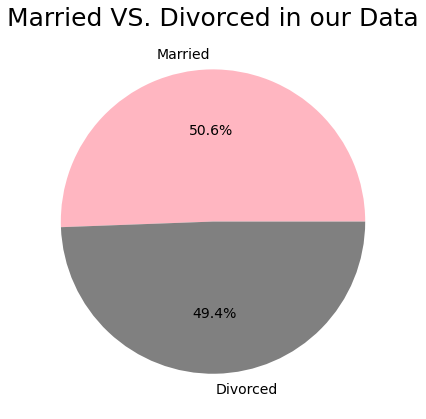

In [1831]:
plt.figure(1, figsize=(15,13))
plt.subplot(1,2,1)
plt.title("Married VS. Divorced in our Data" ,size=(25))
data_copy=data.copy()
data_copy['Divorce_Y_N'] = data_copy['Divorce_Y_N'].replace(1,'Divorced')
data_copy['Divorce_Y_N'] = data_copy['Divorce_Y_N'].replace(0,'Married')
data_copy['Divorce_Y_N'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['lightpink','grey'], textprops={'fontsize': 14})
plt.ylabel("");

##### <font color='pink'>86 married people</font>
##### <font color='grey'>84 divorced people</font>

## <font color='grey'>Digging the Data:</font>

#### From a research conducted by Dr. Gottman, there are four main causes of divorce :
##### 1. Criticism = ביקורת
##### 2. Contempt = בוז, זלזול
##### 3. Defensiveness = מנגנוני הגנה
##### 4. Stonewalling = השהיית אימותים

#### We decided to check if our data can prove this statement:

#### We chose one question for each cause of divorce according to Gottman and checked if they proved his opinion-

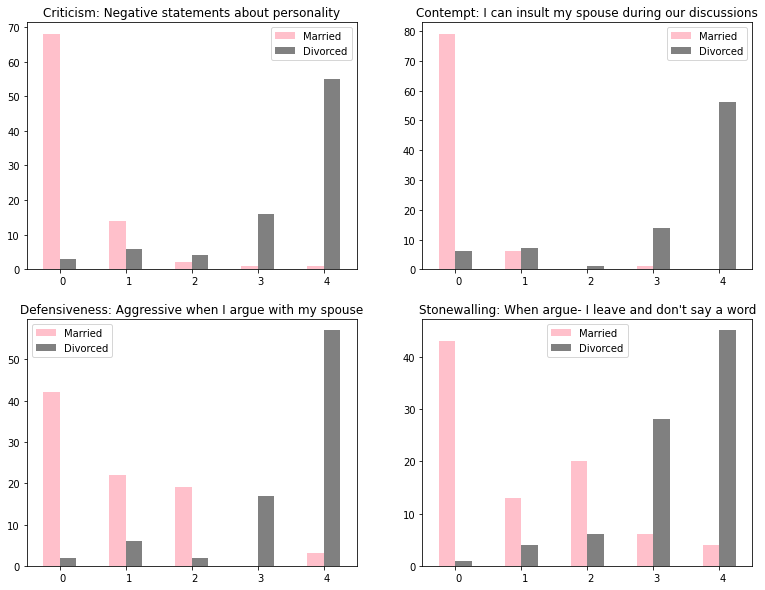

In [1834]:
fig, axes= plt.subplots(2,2, figsize=(13,10))

plt.sca(axes[0, 0])
negative_personality.plot(kind='bar', title="Criticism: Negative statements about personality",figsize=(13,10),ax=axes[0,0],color={"negative_personality_married": "pink", "negative_personality_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[0, 1])
insult.plot(kind='bar', title="Contempt: I can insult my spouse during our discussions",figsize=(13,10),ax=axes[0,1], color={"insult_married": "pink", "insult_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[1, 0])
Aggro_argue.plot(kind='bar', title="Defensiveness: Aggressive when I argue with my spouse",figsize=(13,10),ax=axes[1,0],color={"Aggro_argue_married": "pink", "Aggro_argue_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[1, 1])
argue_then_leave.plot(kind='bar', title="Stonewalling: When argue- I leave and don't say a word",figsize=(13,10),ax=axes[1,1], color={"argue_then_leave_married": "pink", "argue_then_leave_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);


###  <ins>Observation 1:</ins> 
#### ***The questions we chose to investigate indeed proved his opinion, therefore Gottman's causes of divorce are correct in our Data.***

#### During the continuation of our research, we discovered results that caught our attention - the results for the "I am not afraid to tell about my spouse about her/his incompetence" question were different from expected.

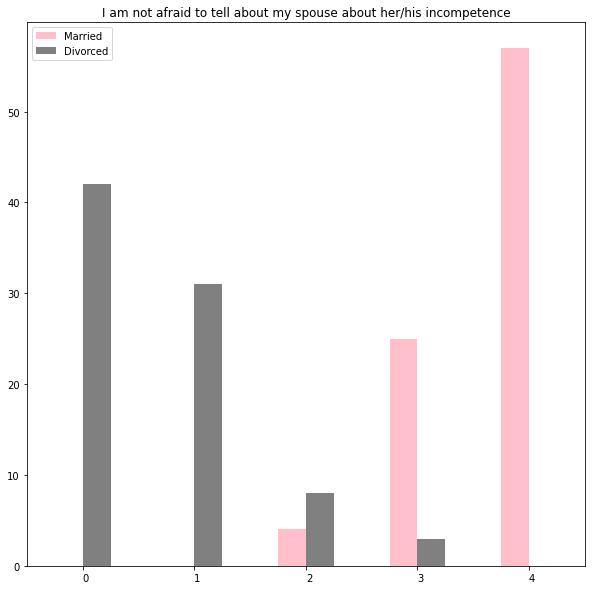

In [1836]:
incompetence.plot(kind='bar', title="I am not afraid to tell about my spouse about her/his incompetence",figsize=(10,10), color={"incompetence_married": "pink", "incompetence_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

###  <ins>Observation 2:</ins> 
#### It can be seen that the divorcees were afraid to give their opinion, while the married people were not, when we expected to see the opposite.
#### According to Gottman, divorcees are not afraid to criticize and even talk to their spouse with contempt.
#### Therefore, ***Gottman's findings do not <ins>fully</ins> prove themselves in our data.***

#### These findings made us want to re-examine the data in order to find additional reasons for divorce, beyond Gottman's results:
#### We chose to display the answers to additional questions that showed different results than expected-

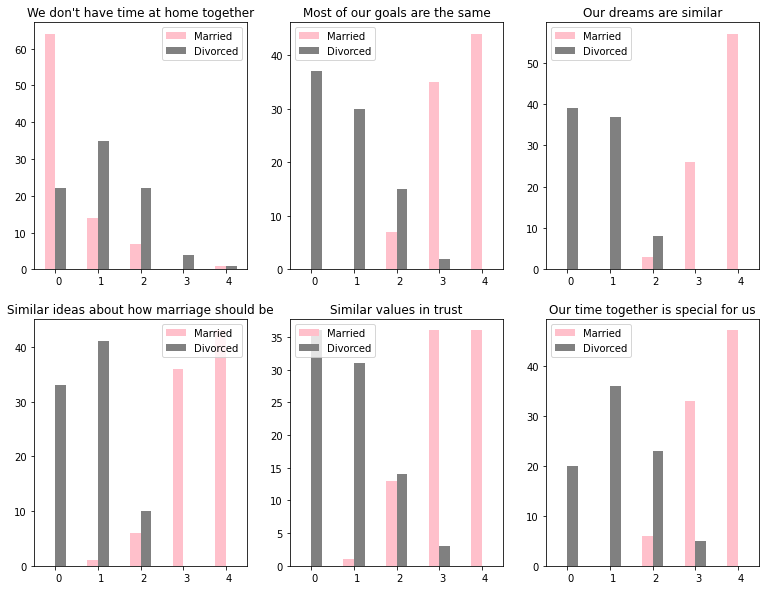

In [1820]:
fig, axes= plt.subplots(2,3, figsize=(13,10))

plt.sca(axes[0, 0])
No_home_time.plot(kind='bar', title= "We don't have time at home together",ax=axes[0,0], color={"No_home_time_married": "pink", "No_home_time_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[0, 1])
people_goals.plot(kind='bar', title="Most of our goals are the same",ax=axes[0,1], color={"people_goals_married": "pink", "people_goals_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[0, 2])
dreams.plot(kind='bar', title="Our dreams are similar",ax=axes[0,2], color={"dreams_married": "pink", "dreams_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[1, 0])
marriage.plot(kind='bar', title="Similar ideas about how marriage should be",ax=axes[1,0], color={"marriage_married": "pink", "marriage_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[1, 1])
trust.plot(kind='bar', title="Similar values in trust",ax=axes[1,1], color={"trust_married": "pink", "trust_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);

plt.sca(axes[1, 2])
Special_time.plot(kind='bar', title="Our time together is special for us",ax=axes[1,2], color={"Special_time_married": "pink", "Special_time_divorced": "grey"}).legend(["Married", "Divorced"]);
plt.xticks(rotation=0, horizontalalignment="left",fontsize=10);


###  <ins>Observation 3:</ins> 
#### From our findings, along with Gottman's, we found renewed conclusions regarding the reasons for divorce-
#### ***1. Different outlook on life = השקפת חיים שונה***
#### ***2. Unhealthy discourse = שיח לא בריא***
#### ***3. Commitment to the relationship = מחויבות לקשר***

#### In order to test if our findings can prove themselves, we published a questionnaire for married and divorced people, including questions that may prove our renewed reasons for divorce.

####  <ins>The questionnaire:</ins> (published in hebrew)
1. ?האם אני מרגיש שהשקעתי יותר מבן/בת זוגי על מנת לתקן את הקשר
2. ?האם במהלך ויכוח העדפתי לשתוק על מנת לסיים אותו 
3. ?האם פיניתי מספיק זמן בשבוע לזמן זוגי
4. ?האם ידעתי לוותר בשביל בן / בת זוגי
5. ?האם השיח נהיה תוקפני
6. ?האם הרגשתי שהשיח בינינו לא היה מכבד
7. ?האם העדפנו לפתור סכסוכים בדיבור ולא להתעלם
8. ?לפעמים במהלך שיחה הייתי שותק כדי לא להגיע למצב של אי שליטה בכעס שלי
9. ?האם לבן/בת הזוג שלי ולי היו ערכים דומים באמון
10. ?האם החלומות של בן/בת זוגי ושלי היו דומים
11. ?האם רוב המטרות שלנו היו משותפות
12. ?האם הסכמנו על איך זוגיות צריכה להראות

Answered by Yes\No

#### We created a new DataFrame from it and made a prediction, using the DecisionTreeClassifier:

In [1837]:
questionnaire = 'https://raw.githubusercontent.com/ElishOyer/DataAnalysisProject/main/new_divorce_test.csv'
divorce_df = pd.read_csv(questionnaire)
divorce_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,MD
0,1,0,1,1,0,0,1,0,1,1,1,1,1
1,0,1,1,0,1,1,0,1,0,1,0,1,1
2,0,1,0,1,0,0,1,1,1,1,0,0,1
3,0,1,1,0,0,0,1,1,1,1,1,1,1
4,0,0,0,0,0,1,0,1,0,0,0,0,1


In [1848]:
model = sk.tree.DecisionTreeClassifier(criterion="gini")
features = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12']
X = divorce_df[features]
y = divorce_df['MD']

In [1849]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [1853]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)

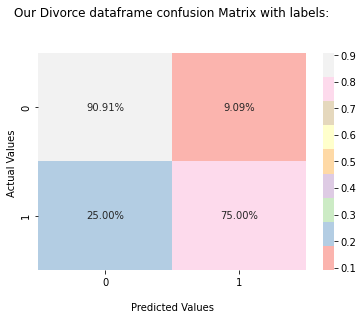

In [1852]:
cm = confusion_matrix(y_test, prediction, labels=model.classes_, normalize='true')
ax = sns.heatmap(cm, annot=True, fmt='.2%', cmap='Pastel1')
ax.set_title('Our Divorce dataframe confusion Matrix with labels:\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix-
plt.show()

#### ***It can be seen that the percentages of accuracy constitute proof of the possible existence of the results from our research.***

## <font color='grey'>In conclusion:</font>
### The data provided us with 3 main observations regarding Dr. Gottman's research along with the possible reasons for divorce:
### 1. Gottman's causes of divorce can be seen in our Data.
### 2. Gottman's findings do not fully prove themselves in our data and other reasons for divorce can be found.
### 3. The possible reasons for divorce from our opinion are- 
### having a different outlook on life, unhealthy discourse and a lack of commitment to the relationship.

## <font color='grey'>Thank you for listening!</font>